svm regression

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [3]:
dt = pd.read_csv(r"C:\Users\sanid\OneDrive\Desktop\machine-learning-full\regression models\svr\Position_Salaries.csv")
print(dt)

            Position  Level   Salary
0   Business Analyst      1    45000
1  Junior Consultant      2    50000
2  Senior Consultant      3    60000
3            Manager      4    80000
4    Country Manager      5   110000
5     Region Manager      6   150000
6            Partner      7   200000
7     Senior Partner      8   300000
8            C-level      9   500000
9                CEO     10  1000000


In [4]:
X = dt.iloc[:, 1:-1].values
Y = dt.iloc[:, -1].values
print(X)
print(Y)

[[ 1]
 [ 2]
 [ 3]
 [ 4]
 [ 5]
 [ 6]
 [ 7]
 [ 8]
 [ 9]
 [10]]
[  45000   50000   60000   80000  110000  150000  200000  300000  500000
 1000000]


FEATURE SCALING   also standard scaler requires a 2d array

In [5]:
Y = Y.reshape(-1,1)
print(Y)

[[  45000]
 [  50000]
 [  60000]
 [  80000]
 [ 110000]
 [ 150000]
 [ 200000]
 [ 300000]
 [ 500000]
 [1000000]]


In [6]:
from sklearn.preprocessing import StandardScaler
sc_x = StandardScaler()
sc_y = StandardScaler()
X = sc_x.fit_transform(X)
Y = sc_y.fit_transform(Y)


In [7]:
print(np.column_stack((X,Y)))

[[-1.5666989  -0.72004253]
 [-1.21854359 -0.70243757]
 [-0.87038828 -0.66722767]
 [-0.52223297 -0.59680786]
 [-0.17407766 -0.49117815]
 [ 0.17407766 -0.35033854]
 [ 0.52223297 -0.17428902]
 [ 0.87038828  0.17781001]
 [ 1.21854359  0.88200808]
 [ 1.5666989   2.64250325]]


Training model on svm

In [8]:
from sklearn.svm import SVR
model = SVR(kernel='rbf')
model.fit(X,Y)

C:\Users\sanid\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\utils\validation.py:1310: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


SVR()

In [9]:
sc_y.inverse_transform(model.predict(sc_x.transform([[6.5]])).reshape(-1, 1)) # we transform 6.5 as the model is trained on scaled data and to get final predictions we use inverse transform

array([[170370.0204065]])

plotting results

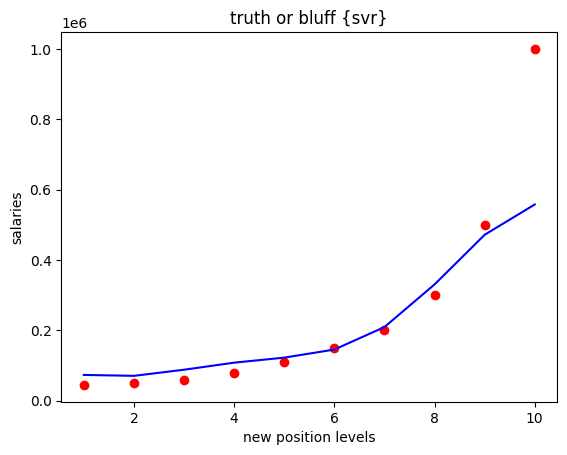

In [10]:
plt.scatter(sc_x.inverse_transform(X),sc_y.inverse_transform(Y),color='red')
plt.plot(sc_x.inverse_transform(X),sc_y.inverse_transform(model.predict(X).reshape(-1,1)),color='blue')
plt.title('truth or bluff {svr}')
plt.xlabel('new position levels')
plt.ylabel('salaries')
plt.show()

In [11]:
from sklearn.metrics import mean_absolute_percentage_error
mae = mean_absolute_percentage_error(sc_y.inverse_transform(model.predict(X).reshape(-1,1)),Y)
print(f"the mae for the svr model is: {mae}")

the mae for the svr model is: 1.0000032902280225
